<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/3)%20Change%20number%20of%20processors%20loading%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Learn how to change number of processors

# Table of Contents


## [0. Install](#0)


## [1. Train with 1 processor loading data](#1)


## [2. Train with 4 processors loading data](#2)


## [3. Compare both the experiments](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2457 (delta 27), reused 0 (delta 0), pack-reused 2404
Receiving objects: 100% (2457/2457), 78.20 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (1362/1362), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset -Skin cancer Mnist
    - https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ" -O skin_cancer_mnist_dataset.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq skin_cancer_mnist_dataset.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Train with 1 processor loading data

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("change-num_processors", "num_1");

Mxnet Version: 1.5.0

Experiment Details
    Project: change-num_processors
    Experiment: num_1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-num_processors/num_1/



In [4]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv", 
            model_name="resnet18_v1", 
            freeze_base_network=True,
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## Update num processors

In [5]:
gtf.update_num_processors(1)

# Very important to reload post updating
gtf.Reload();

Update: Num processors - 1

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       1



In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.643, Train-loss: 1.127 | Val-acc: 0.435607, Val-loss: 1.529, | time: 77.6 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.669, Train-loss: 1.013 | Val-acc: 0.666223, Val-loss: 0.975, | time: 78.1 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.670, Train-loss: 0.979 | Val-acc: 0.659567, Val-loss: 0.974, | time: 77.7 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.667, Train-loss: 0.985 | Val-acc: 0.697837, Val-loss: 0.955, | time: 77.8 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.687, Train-loss: 0.923 | Val-acc: 0.695507, Val-loss: 0.934, | time: 77.5 sec

    Training completed in: 6m 26s
    Best val Acc:          0.697837

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-num_processors/num_1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-num_processors/num_1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train

<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Train using 4 processors for loading data

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("change-num_processors", "num_4");

Mxnet Version: 1.5.0

Experiment Details
    Project: change-num_processors
    Experiment: num_4
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-num_processors/num_4/



In [8]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18_v1", 
            freeze_base_network=True,
            num_epochs=5);

#Read the summary generated once you run this cell.

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## Update num processors to 4

In [9]:
gtf.update_num_processors(4);

# Very Important to reload
gtf.Reload();

Update: Num processors - 4

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       1



In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.655, Train-loss: 1.090 | Val-acc: 0.682196, Val-loss: 1.048, | time: 34.6 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.678, Train-loss: 0.979 | Val-acc: 0.644260, Val-loss: 0.962, | time: 35.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.680, Train-loss: 0.946 | Val-acc: 0.686522, Val-loss: 1.008, | time: 34.7 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.680, Train-loss: 0.943 | Val-acc: 0.623960, Val-loss: 0.974, | time: 34.9 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.684, Train-loss: 0.931 | Val-acc: 0.696839, Val-loss: 1.000, | time: 34.9 sec

    Training completed in: 2m 53s
    Best val Acc:          0.696839

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-num_processors/num_4/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-num_processors/num_4/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train

<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Compare experiments

In [11]:
# Invoke the comparison class
from compare_prototype import compare

# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Statistics");

Comparison: - Statistics


In [12]:
# Add experiment

gtf.Add_Experiment("change-num_processors", "num_1");
gtf.Add_Experiment("change-num_processors", "num_4");


# Generate stats
gtf.Generate_Statistics();

Project - change-num_processors, Experiment - num_1 added
Project - change-num_processors, Experiment - num_4 added
Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [13]:
os.listdir("workspace/comparison/Statistics")

['stats_best_val_acc.png',
 'stats_training_time.png',
 'train_accuracy.png',
 'train_loss.png',
 'val_accuracy.png',
 'stats_max_gpu_usage.png',
 'val_loss.png']

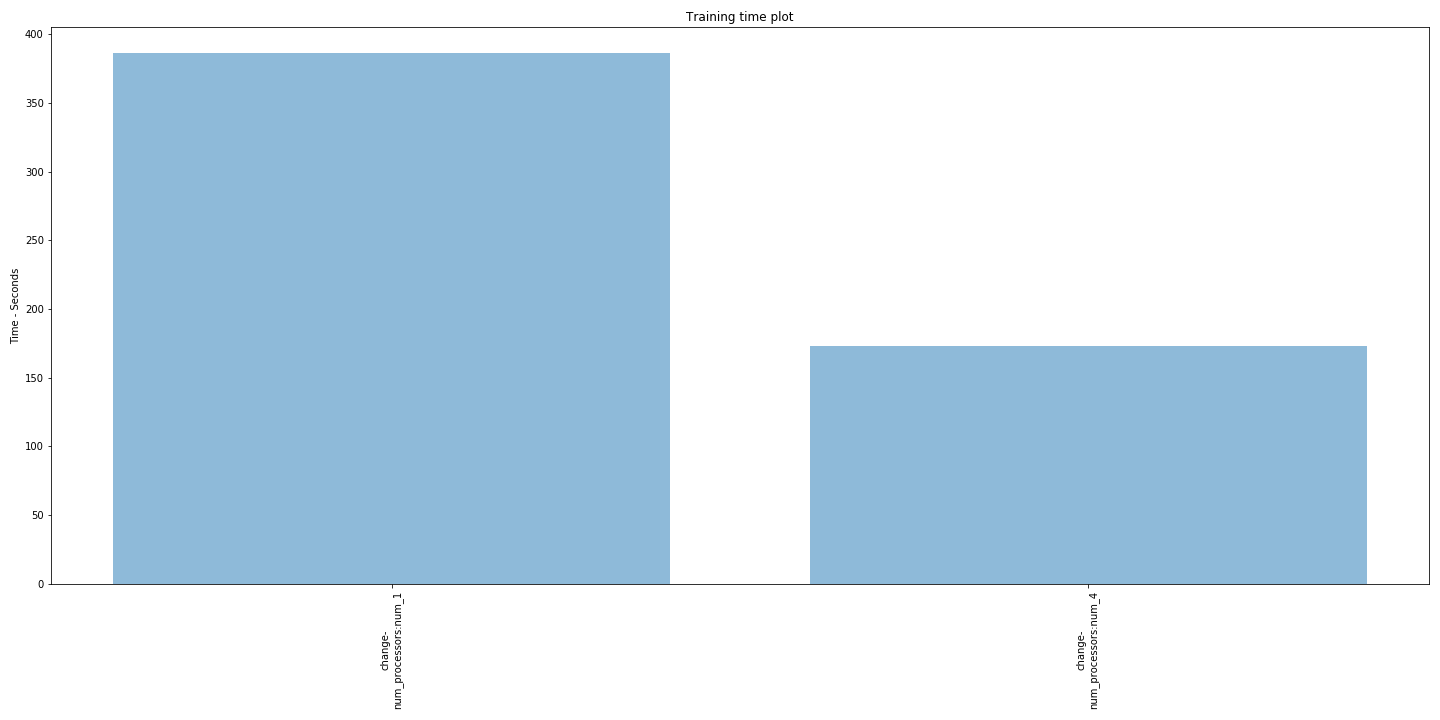

In [14]:
# We are interested only in training time

from IPython.display import Image
Image(filename="workspace/comparison/Statistics/stats_training_time.png") 

## Faster training times with more parallel processors